In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

In [2]:
data = arff.loadarff('phpKo8OWT.arff')
df = pd.DataFrame(data[0])

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,b'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,b'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,b'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,b'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,b'0'


In [4]:
print("Credit Card Fraud Detection data -  rows:", df.shape[0]," columns:", df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,b'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,b'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,b'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,b'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,b'0'


In [6]:
df['Class'] = df['Class'].apply(lambda x: x.decode('utf-8'))

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.205498e-16,-2.406306e-15,...,6.407202e-16,1.656562e-16,-3.568593e-16,2.610582e-16,4.473066e-15,5.213180e-16,1.683537e-15,-3.659966e-16,-1.223710e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [8]:
df.isnull().sum().sort_values(ascending = False)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

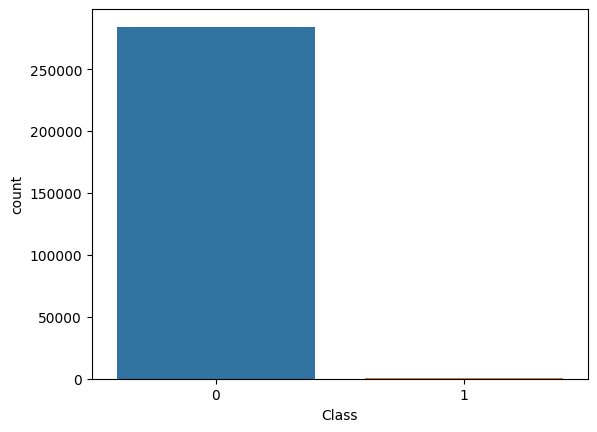

In [9]:
sns.countplot(x=df["Class"])

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
df[df['Class'] == '1']

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df['Class'] = df['Class'].apply(lambda x: int(x))

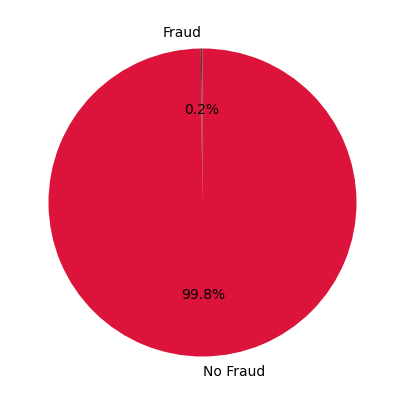

In [14]:
fig,ax = plt.subplots(nrows = 1,
                      ncols = 1,
                      figsize = (20,5))
plt.subplot(1,1,1)

plt.pie([len(df[df['Class'] == 1]) / len(df) * 100, 
         len(df[df['Class'] == 0]) / len(df) * 100],
        labels = ['Fraud','No Fraud'],
        autopct='%1.1f%%',
        startangle = 90,
        colors = ['#3B3B3C', 'crimson'],
       )
plt.show()

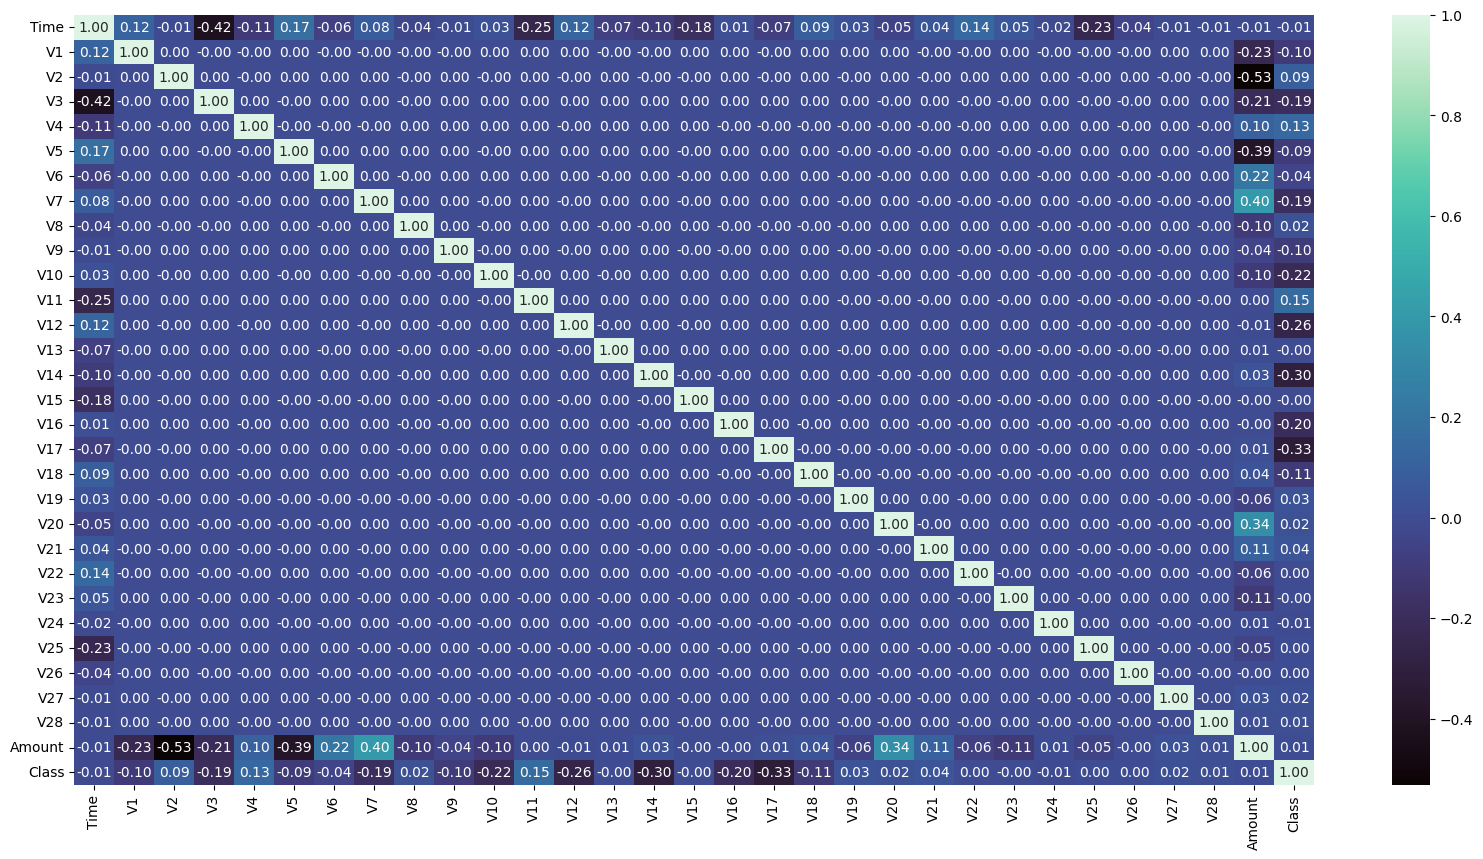

In [15]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr() ,cbar = True, cmap = 'mako', annot = True, fmt = '1.2f')
plt.show()

In [16]:
df['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

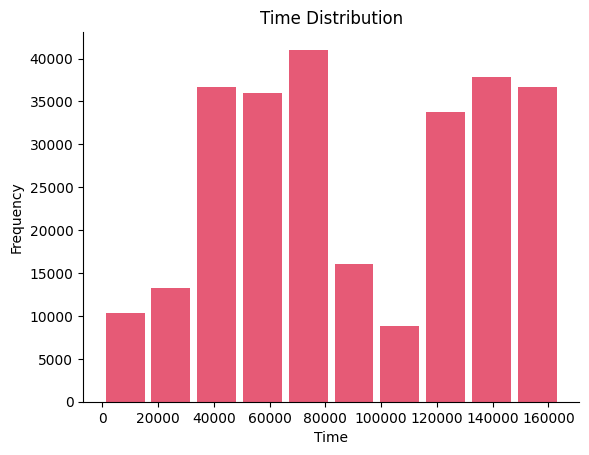

In [17]:
plt.hist(df[df['Time'] < df['Time'].quantile(0.95)]['Time'], 
         color='crimson', 
         alpha=0.7, rwidth=0.85)
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
plt.grid(False)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Time Distribution')
plt.show()

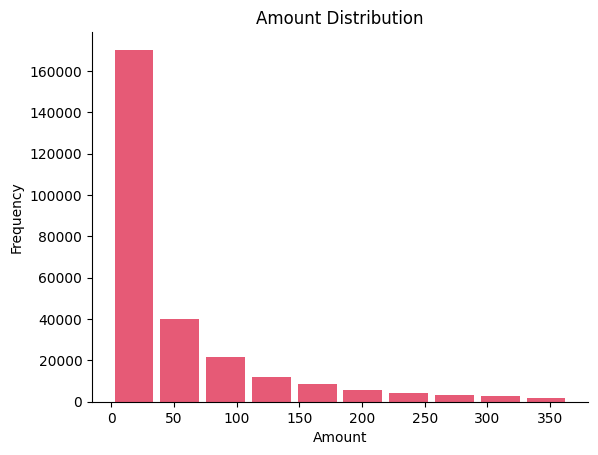

In [18]:
plt.hist(df[df['Amount'] < df['Amount'].quantile(0.95)]['Amount'], 
         color='crimson', 
         alpha=0.7, rwidth=0.85)
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
plt.grid(False)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount Distribution')
plt.show()

In [19]:
import datetime

In [20]:
time_df = df[['Time', 'Amount', 'Class']].copy()
time_df['datetime'] = time_df.Time.apply(lambda x: datetime.datetime.fromtimestamp(x))
time_df['Hours'] = time_df.datetime.dt.hour
time_df_grouped = time_df.groupby(['Class', 'Hours'])['Amount'].count()

<Figure size 2000x600 with 0 Axes>

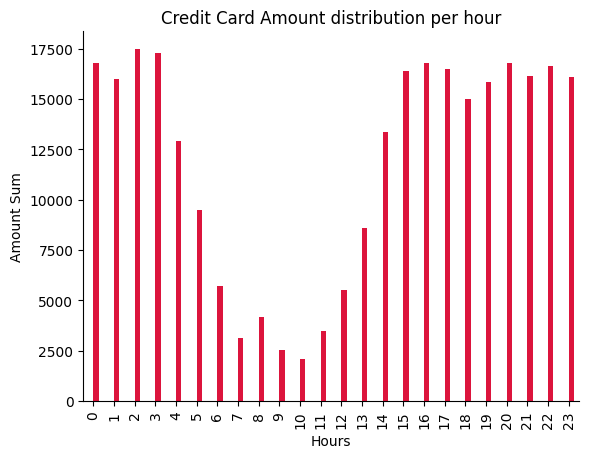

In [21]:
plt.figure(figsize = (20, 6))
amount_df = time_df_grouped.reset_index().groupby(['Hours']).agg({'Amount': 'sum'}).reset_index()
amount_df.plot.bar(title = 'Credit Card Amount distribution per hour', legend = False, color = 'crimson')
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
plt.grid(False)
plt.xlabel('Hours')
plt.ylabel('Amount Sum')
plt.show()

In [22]:
print('There are only '+ str(df[(df['Amount'] > 1000) & (df['Class'] == 1)].shape[0]) + ' frauds where the transcation amount is bigger than 1000 dollar ' + str(df.shape[0]) + ' frauds')

There are only 9 frauds where the transcation amount is bigger than 1000 dollar 284807 frauds


In [23]:
from sklearn.decomposition import PCA

In [24]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [25]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [26]:
pca_3d = PCA(n_components = 3, random_state = 1)
X_pca = pca_3d.fit_transform(X)
X_pca = pd.DataFrame(X_pca, columns = ['PC1', 'PC2', 'PC3'])

In [27]:
X_pca

,PC1,PC2,PC3
0,87697.145364,61.622396,-16.834025
1,87697.157434,-85.311276,-17.020318
2,87696.126498,290.666296,-16.621924
3,87696.147486,35.502308,-17.004129
4,87695.151904,-18.009084,-16.879472
...,...,...,...
568625,60172.255473,-29.612838,14.153777
568626,51760.641332,-77.342911,9.664329
568627,46418.840281,21.535859,30.028050
568628,46511.225330,-76.007904,26.167551


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size= 0.3)

In [29]:
def train_and_predict_classification_ml_model(model, X_train, y_train, X_test, y_test, model_name):
    print('Model Name', model_name)
    model.fit(X_train, y_train)
    print('Training score', model.score(X_train, y_train))
    print('Testing score', model.score(X_test, y_test))
    print(classification_report(y_test, model.predict(X_test)))
    
    print('Confusion_matrix \n')
    cm = confusion_matrix(y_test, model.predict(X_test))
    #Plot the confusion matrix.
    sns.heatmap(cm,
                annot=True,
                fmt='g',
                xticklabels=['Fraud','Not Fraud'],
                yticklabels=['Fraud','Not Fraud'])
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()
    return model

Model Name Logistic regression
Training score 0.9470531930127801
Testing score 0.9481795426434295
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85205
           1       0.98      0.92      0.95     85384

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Confusion_matrix 



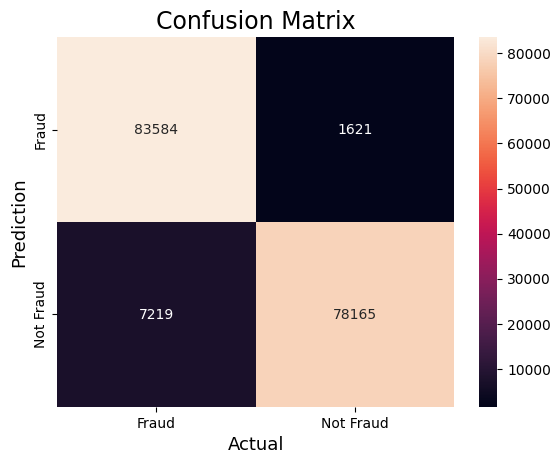

In [30]:
logistic_regression = LogisticRegression()
logistic_regression = train_and_predict_classification_ml_model(logistic_regression, X_train, y_train, X_test, y_test, 'Logistic regression')

Model Name Decision Tree Classification
Training score 1.0
Testing score 0.9936338216414892
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85205
           1       0.99      1.00      0.99     85384

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

Confusion_matrix 



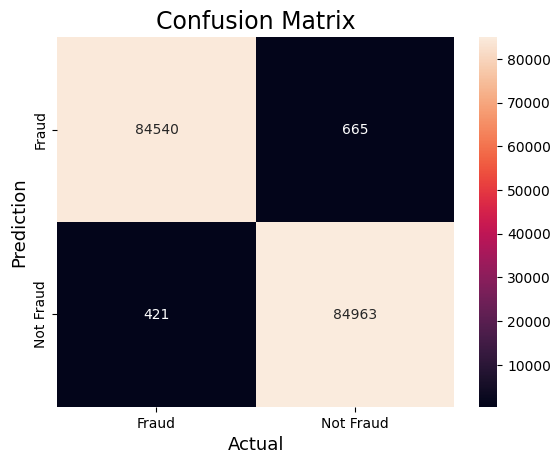

In [31]:
decision_classification = DecisionTreeClassifier()
decision_classification = train_and_predict_classification_ml_model(decision_classification, X_train, y_train, X_test, y_test, 'Decision Tree Classification')

Model Name Random Forest Classification
Training score 1.0
Testing score 0.994313818593227
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85205
           1       0.99      1.00      0.99     85384

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589

Confusion_matrix 



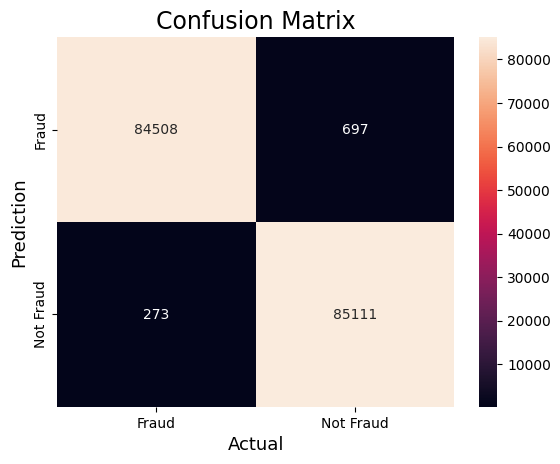

In [32]:
random_forest_classification = RandomForestClassifier()
random_forest_classification = train_and_predict_classification_ml_model(random_forest_classification, X_train, y_train, X_test, y_test, 'Random Forest Classification')

Model Name Gaussian NB Classification
Training score 0.876512721051349
Testing score 0.8782043390839972
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     85205
           1       1.00      0.76      0.86     85384

    accuracy                           0.88    170589
   macro avg       0.90      0.88      0.88    170589
weighted avg       0.90      0.88      0.88    170589

Confusion_matrix 



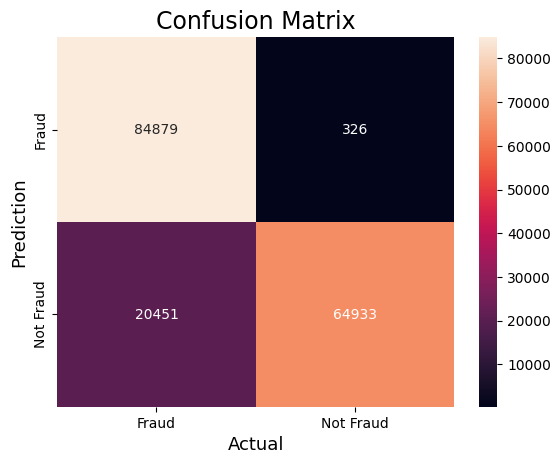

In [33]:
GaussianNB_classification = GaussianNB()
GaussianNB_classification = train_and_predict_classification_ml_model(GaussianNB_classification, X_train, y_train, X_test, y_test, 'Gaussian NB Classification')